In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import preprocessing


In [2]:
Fraud = pd.read_csv("C:\\Users\\Admin\\Downloads\\vidya\\FraudRF.csv")

In [3]:
Fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
Fraud.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [5]:
Fraud.tail(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
590,NO,Married,43018,85195,14,YES
591,YES,Single,27394,132859,18,YES
592,YES,Single,68152,75143,16,NO
593,NO,Divorced,84775,131963,10,YES
594,NO,Married,47364,97526,9,YES
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [6]:
Fraud.shape

(600, 6)

In [7]:
Fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [8]:
Fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


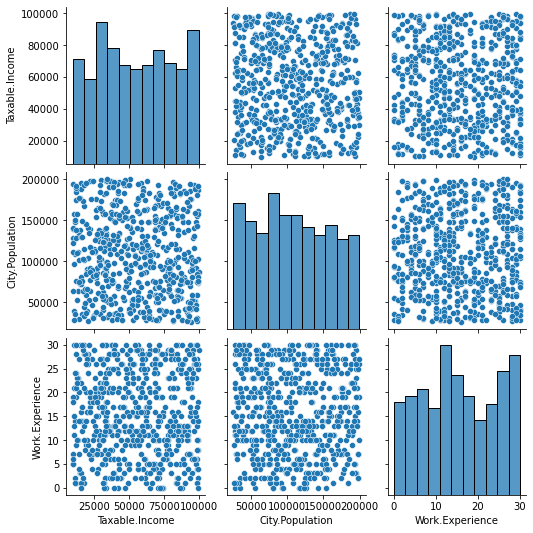

In [9]:
sns.pairplot(Fraud)

<AxesSubplot:>

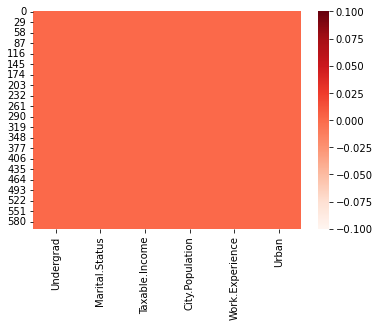

In [10]:
sns.heatmap(Fraud.isnull(),cmap='Reds')


<AxesSubplot:>

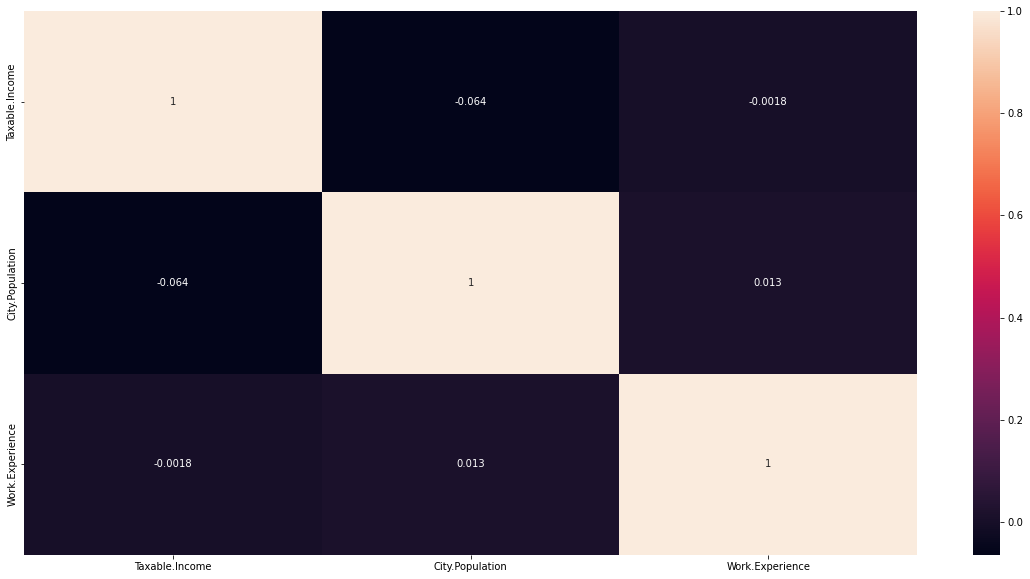

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(Fraud.corr(),annot=True)


In [12]:
label_encoder = preprocessing.LabelEncoder()


In [13]:
Fraud['Undergrad']= label_encoder.fit_transform(Fraud['Undergrad'])
Fraud['Urban']= label_encoder.fit_transform(Fraud['Urban'])
Fraud['Marital.Status']= label_encoder.fit_transform(Fraud['Marital.Status'])
Fraud


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [14]:
Fraud['Status'] = Fraud['Taxable.Income'].apply(lambda Income: 'Risky' if Income <= 30000 else 'Good')
Fraud['Status']= label_encoder.fit_transform(Fraud['Status'])
Fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Status
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [15]:
Fraud.Status.unique()


array([0, 1])

In [16]:
x=Fraud.iloc[:,0:4]
x


,Undergrad,Marital.Status,Taxable.Income,City.Population
0,0,2,68833,50047
1,1,0,33700,134075
2,0,1,36925,160205
3,1,2,50190,193264
4,0,1,81002,27533
...,...,...,...,...
595,1,0,76340,39492
596,1,0,69967,55369
597,0,0,47334,154058
598,1,1,98592,180083


In [17]:
y=Fraud.iloc[:,0:4]
y


,Undergrad,Marital.Status,Taxable.Income,City.Population
0,0,2,68833,50047
1,1,0,33700,134075
2,0,1,36925,160205
3,1,2,50190,193264
4,0,1,81002,27533
...,...,...,...,...
595,1,0,76340,39492
596,1,0,69967,55369
597,0,0,47334,154058
598,1,1,98592,180083


In [18]:
y=Fraud['Status']
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Status, Length: 600, dtype: int32

In [19]:
#Bagged Decision Trees for Classification

In [20]:
num_trees=100
seed=8

In [21]:
kfold = KFold(n_splits=100, shuffle = True, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x,y, cv=kfold)
print(results.mean())

0.9983333333333334


In [22]:
#Stacking Ensemble for Classification

In [23]:
kfold = KFold(n_splits=10,shuffle=True, random_state=8)

In [24]:
# create the sub modelsestimators = []
estimators = []
model1 = LogisticRegression(max_iter=100) 

In [25]:
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()

In [26]:
estimators.append(('cart', model2))
model3 = SVC()

In [27]:
estimators.append(('svm', model3))
ensemble = VotingClassifier(estimators)                            # create the ensemble model

In [28]:
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

0.9833333333333332


In [ ]:
#Random Forest Classification

In [30]:
num_trees = 100
max_features = 3

In [31]:
kfold = KFold(n_splits=10, shuffle= True ,random_state=8)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [32]:
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.9983333333333334


In [ ]:
#Boost classification

In [33]:
num_trees = 100
seed=8

In [34]:
kfold = KFold(n_splits=100, shuffle = True, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)

In [35]:
results = cross_val_score(model, x,y, cv=kfold)
print(results.mean())

0.9983333333333334
